<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/basicdeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
df  = pd.read_csv('/content/drive/My Drive/deeplearning/bank.csv')

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [11]:
'''
Age: The age of the customer.
Job: The occupation of the customer.
Marital Status: The marital status of the customer.
Education: The education level of the customer.
Default: Whether or not the customer has credit in default.
Balance: The balance of the customer's account.
Housing Loan: Whether or not the customer has a housing loan.
Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
Day: The day of the month when the last contact with the customers was made.
Duration: The duration (in seconds) of the current visit.
Campaign Contacts Count: Number of contacts performed during this campaign for each customer
-pdays : number days passed since previously contacted form previous camapign
-poutcome : outcome from previous marketing campaign
duration field is droped in eda as it is highly correlated with y and comes to know only after call is completed
EDA and preprocessing aim to prepare features that would be available before making a prediction (e.g., before calling the client).

Since duration can’t be known ahead of time, it doesn’t help in simulating or optimizing future marketing strategies.
'''


"\nAge: The age of the customer.\nJob: The occupation of the customer.\nMarital Status: The marital status of the customer.\nEducation: The education level of the customer.\nDefault: Whether or not the customer has credit in default.\nBalance: The balance of the customer's account.\nHousing Loan: Whether or not the customer has a housing loan.\nContact Communication Type: The method used to contact the customer (e.g., telephone, cellular).\nDay: The day of the month when the last contact with the customers was made.\nDuration: The duration (in seconds) of the current visit.\nCampaign Contacts Count: Number of contacts performed during this campaign for each customer\n-pdays : number days passed since previously contacted form previous camapign\n-poutcome : outcome from previous marketing campaign\nduration field is droped in eda as it is highly correlated with y and comes to know only after call is completed\nEDA and preprocessing aim to prepare features that would be available before 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [8]:
df.drop(['duration'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   int64 
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


In [14]:
df["y"].value_counts()

,count
y,
0,4000
1,521


In [12]:
x=df.drop("y", axis=1)
y=df["y"]

In [13]:
cat_cols=x.select_dtypes(include=["object"]).columns
x=pd.get_dummies(x,columns=cat_cols,drop_first=True)

In [14]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [16]:
model=Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [19]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6846 - loss: 0.5935 - val_accuracy: 0.8840 - val_loss: 0.3846
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8848 - loss: 0.3572 - val_accuracy: 0.8840 - val_loss: 0.3361
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8885 - loss: 0.3175 - val_accuracy: 0.8923 - val_loss: 0.3048
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8788 - loss: 0.3079 - val_accuracy: 0.8923 - val_loss: 0.2845
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8938 - loss: 0.2766 - val_accuracy: 0.8978 - val_loss: 0.2724
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8972 - loss: 0.2691 - val_accuracy: 0.9033 - val_loss: 0.2649
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8925 - loss: 0.2738 - val_accuracy: 0.9061 - val_loss: 0.2606
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8984 - loss: 0.2586 - val_accuracy: 0.

In [ ]:
'''
Training Accuracy -> 93.49%
Validation Accuracy -> 88.12%

Training and Validation performance are within 5% of each other.
Also, both the performance values are above 90%
'''

In [21]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8898 - loss: 0.2505 
Test Loss: 0.2332
Test Accuracy: 0.8972


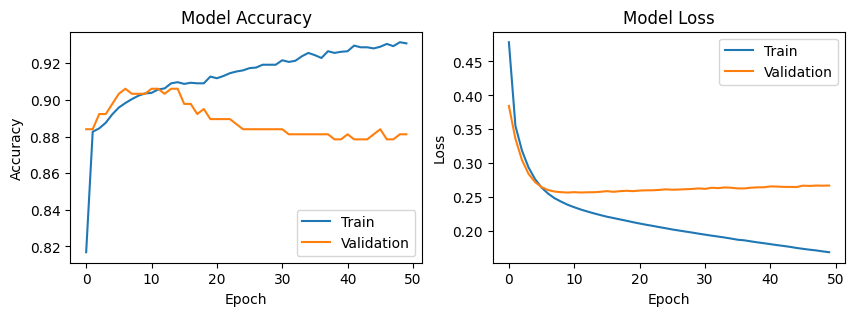

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Plot
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()